## DS 2500 – Final Project


Aaron Templeton

U0734119 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
import geopandas

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 931kB 9.3MB/s 
     |████████████████████████████████| 10.4MB 65.2MB/s 
     |████████████████████████████████| 14.7MB 311kB/s 
     |████████████████████████████████| 225kB 9.6MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=f6e1111788e397ef5076a1fff9e5828e5e88159d6190041a2042a658839c8cb0
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.0)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


#Are School Zones Effective?

The data analyzed in this notebook will attempt to determine if school zones are effective in preventing injury and death from accident. There has been a lot of debate surrounding the issue and it continues to be researched for improvements. 

The Datasets used in this analysis are: 

1. [USA Public Schools](https://www.kaggle.com/carlosaguayo/usa-public-schools)
2. [US Accidents](https://www.kaggle.com/sobhanmoosavi/us-accidents)


---


###USA Public Schools
This Public Schools feature dataset is composed of all Public elementary and secondary education facilities in the United States.

has the following data:

* X
* Y
* OBJECTID
* NCESID
* NAME
* ADDRESS
* CITY
* STATE
* ZIP
* ZIP4
* TELEPHONE
* TYPE
* STATUS
* POPULATION
* COUNTY
* COUNTYFIPS
* COUNTRY
* LATITUDE
* LONGITUDE
* NAICS_CODE
* NAICS_DESC
* SOURCE
* SOURCEDATE
* VAL_METHOD
* VAL_DATE
* WEBSITE
* LEVEL_
* ENROLLMENT
* ST_GRADE
* END_GRADE
* DISTRICTID
* FT_TEACHER
* SHELTER_ID


---


###US Accidents

* **ID** - This is a unique identifier of the accident record.
SourceIndicates source of the accident report (i.e. the API which reported the accident.).
* **TMCA** -  traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.
* **Severity** - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
* **Start_Time** - Shows start time of the accident in local time zone.
* **End_Time** - Shows end time of the accident in local time zone.
* **Start_Lat** - Shows latitude in GPS coordinate of the start point.
* **Start_Lng** - Shows longitude in GPS coordinate of the start point.
* **End_Lat** - Shows latitude in GPS coordinate of the end point.
* **End_Lng** - Shows longitude in GPS coordinate of the end point.
* **Distance(mi)** - The length of the road extent affected by the accident.
* **Description** - Shows natural language description of the accident.
* **Number** - Shows the street number in address field.
* **Street** - Shows the street name in address field.
* **Side** - Shows the relative side of the street (Right/Left) in address field.
* **City** - Shows the city in address field.
* **County** - Shows the county in address field.
* **State** - Shows the state in address field.
* **Zip** - codeShows the zipcode in address field.
* **Country** - Shows the country in address field.
* **Timezone** - Shows timezone based on the location of the accident (eastern, central, etc.).
* **Airport_Code** - Denotes an airport-based weather station which is the closest one to location of the accident.
* **Weather_Timestamp** - Shows the time-stamp of weather observation record (in local time).
* **Temperature(F)** - Shows the temperature (in Fahrenheit).
* **Wind_Chill(F)** - Shows the wind chill (in Fahrenheit).
* **Humidity(%)** - Shows the humidity (in percentage).
* **Pressure(in)** - Shows the air pressure (in inches).
* **Visibility(mi)** - Shows visibility (in miles).
* **Wind_Direction** - Shows wind direction.
* **Wind_Speed(mph)** - Shows wind speed (in miles per hour).
* **Precipitation(in)** - Shows precipitation amount in inches, if there is any.
* **Weather_Condition** - Shows the weather condition (rain, snow, thunderstorm, fog, etc.).
* **Amenity** - A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.
* **Bump** - POI annotation which indicates presence of speed bump or hump in a nearby location.
* **Crossing** - A POI annotation which indicates presence of crossing in a nearby location.
* **Give_Way** - A POI annotation which indicates presence of give_way sign in a nearby location.
* **Junction** - A POI annotation which indicates presence of junction in a nearby location.
* **No_Exit** - A POI annotation which indicates presence of no_exit sign in a nearby location.
* **Railway** - A POI annotation which indicates presence of railway in a nearby location.
* **Roundabout** - A POI annotation which indicates presence of roundabout in a nearby location.
* **Station** - A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.
* **Stop** - A POI annotation which indicates presence of stop sign in a nearby location.
* **Traffic_Calming** - A POI annotation which indicates presence of traffic_calming means in a nearby location.
* **Traffic_Signal** - A POI annotation which indicates presence of traffic_signal in a nearby location.
* **Turning_Loop** - A POI annotation which indicates presence of turning_loop in a nearby location.
* **Sunrise_Sunset** - Shows the period of day (i.e. day or night) based on sunrise/sunset.
* **Civil_Twilight** - Shows the period of day (i.e. day or night) based on civil twilight.
* **Nautical_Twilight** - Shows the period of day (i.e. day or night) based on nautical twilight.
* **Astronomical_Twilight** - Shows the period of day (i.e. day or night) based on astronomical twilight.

Read in the USA Public Schools data

In [2]:
!curl -L "https://www.dropbox.com/s/onwa3knhrju3ssf/Public_Schools.csv?dl=0" > 'schools.csv'
schools_df = pd.read_csv('schools.csv')
schools_df.head(5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 48.2M  100 48.2M    0     0  24.1M      0  0:00:01  0:00:01 --:--:-- 85.4M


,X,Y,OBJECTID,NCESID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,LEVEL_,ENROLLMENT,ST_GRADE,END_GRADE,DISTRICTID,FT_TEACHER,SHELTER_ID
0,-81.050895,29.022271,2002,120192008041,SAMSULA ACADEMY,248 N SAMSULA DR,NEW SMYRNA,FL,32168,8762,(386) 423-6650,1,1,235,VOLUSIA,12127,USA,29.022271,-81.050895,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2014-02-04T00:00:00.000Z,IMAGERY,2014-05-20T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,222,KG,05,1201920,13,NOT AVAILABLE
1,-92.507288,31.180659,2003,220129002344,CAROLINE DORMON JUNIOR HIGH SCHOOL,8906 HWY 165 SOUTH,WOODWORTH,LA,71485,NOT AVAILABLE,(318) 473-4066,1,1,333,RAPIDES,22079,USA,31.180659,-92.507288,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2015-05-08T00:00:00.000Z,IMAGERY/OTHER,2015-06-19T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,312,PK,08,2201290,21,NOT AVAILABLE
2,-69.971880,43.908147,2004,230378023129,HARRIET BEECHER STOWE ELEMENTARY,44 MCKEEN STREET,BRUNSWICK,ME,4011,NOT AVAILABLE,(207) 319-1960,1,1,791,CUMBERLAND,23005,USA,43.908147,-69.971880,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2014-02-04T00:00:00.000Z,IMAGERY,2014-05-07T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,739,02,05,2303780,52,NOT AVAILABLE
3,-89.542799,32.728496,2005,280252001118,LEAKE CENTRAL ELEMENTARY SCHOOL,603 HWY. 16 WEST,CARTHAGE,MS,39051,NOT AVAILABLE,(601) 267-9148,1,1,1222,LEAKE,28079,USA,32.728496,-89.542799,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2010-07-06T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,1159,PK,05,2802520,63,NOT AVAILABLE
4,-94.361775,39.364359,2006,291645000891,KEARNEY ELEM.,902 S JEFFERSON,KEARNEY,MO,64060,8518,(816) 628-4113,1,1,296,CLAY,29047,USA,39.364359,-94.361775,611110,ELEMENTARY AND SECONDARY SCHOOLS,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,2009-10-13T00:00:00.000Z,IMAGERY/OTHER,2016-07-18T00:00:00.000Z,http://nces.ed.gov/GLOBALLOCATOR/sch_info_popu...,1,274,KG,05,2916450,22,NOT AVAILABLE


Read in the US Accidents Data (random sample of 100k)

In [3]:
!curl -L "https://www.dropbox.com/s/ofnb9iwo4njivlu/accidents_sample.csv?dl=0" > "accidents.csv"
accidents_df = pd.read_csv('accidents.csv')
accidents_df.head(5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 37.3M  100 37.3M    0     0  19.4M      0  0:00:01  0:00:01 --:--:-- 51.4M


,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2835179,A-2835203,Bing,NaN,3,2018-01-25 05:53:27,2018-01-25 11:53:27,29.847510,-95.394100,29.85697,-95.40079,0.767,At Parker Rd - Accident.,NaN,I-45 N,R,Houston,Harris,TX,77076,US,US/Central,KIAH,2018-01-25 05:53:00,36.0,33.3,89.0,30.45,10.0,North,3.5,NaN,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
1,486143,A-486149,MapQuest,201.0,2,2017-06-13 16:16:41,2017-06-13 17:01:26,30.442701,-97.750374,NaN,NaN,0.000,Accident on Corpus Christi Dr at Bancroft Wood...,6738.0,Corpus Christi Dr,L,Austin,Williamson,TX,78729-7508,US,US/Central,KATT,2017-06-13 15:51:00,98.1,NaN,37.0,29.81,10.0,SSE,8.1,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,2296454,A-2296478,Bing,NaN,2,2017-01-26 18:07:48,2017-01-27 00:07:48,40.059000,-83.030460,40.06560,-83.03253,0.469,At Bethel Rd - Accident. in the right lane.,NaN,Olentangy Fwy N,R,Columbus,Franklin,OH,43214,US,US/Eastern,KOSU,2017-01-26 17:53:00,33.1,21.5,82.0,29.90,8.0,West,19.6,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
3,765074,A-765083,MapQuest,201.0,2,2019-08-23 15:00:58,2019-08-23 16:00:51,33.841450,-117.255539,NaN,NaN,0.000,Accident on Cajalco Expy at Harvill Ave.,19220.0,Harvill Ave,L,Perris,Riverside,CA,92570-9494,US,US/Pacific,KRIV,2019-08-23 14:58:00,89.0,89.0,30.0,28.23,10.0,NNE,3.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,1610003,A-1610023,MapQuest,201.0,2,2018-06-22 04:59:06,2018-06-22 05:43:35,39.078384,-76.684937,NaN,NaN,0.000,Accident on MD-175 Annapolis Rd at Sappington ...,NaN,Annapolis Rd,R,Odenton,Anne Arundel,MD,21113,US,US/Eastern,KFME,2018-06-22 04:57:00,68.0,NaN,94.0,29.86,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


#Cleaning the datasets

check for inconsistencies in the USA Public School Dataset - the `schools_df`



In [4]:
schools_df.isnull().sum().sort_values(ascending=False)/len(schools_df)*100

X             0.001954
Y             0.001954
LATITUDE      0.001954
LONGITUDE     0.001954
ZIP           0.000000
STATUS        0.000000
TYPE          0.000000
TELEPHONE     0.000000
ZIP4          0.000000
STATE         0.000000
COUNTY        0.000000
CITY          0.000000
ADDRESS       0.000000
NAME          0.000000
NCESID        0.000000
OBJECTID      0.000000
POPULATION    0.000000
SHELTER_ID    0.000000
COUNTYFIPS    0.000000
FT_TEACHER    0.000000
NAICS_CODE    0.000000
NAICS_DESC    0.000000
SOURCE        0.000000
SOURCEDATE    0.000000
VAL_METHOD    0.000000
VAL_DATE      0.000000
WEBSITE       0.000000
LEVEL_        0.000000
ENROLLMENT    0.000000
ST_GRADE      0.000000
END_GRADE     0.000000
DISTRICTID    0.000000
COUNTRY       0.000000
dtype: float64

In [5]:
schools_df.shape

(102370, 33)

the Schools dataframe is very clean. We will however need to drop the few rows that have no values for latitude and longitude since we will need those in our analysis

In [6]:
schools_df.dropna(inplace=True)
schools_df.shape

(102368, 33)

Only dropped 2 rows!!

We will drop the columns that we don't need for our analysis

In [0]:
schools_dropped_df = schools_df.drop(axis=1, labels=['NCESID', 'OBJECTID', 'POPULATION', 'SHELTER_ID', 'COUNTYFIPS','FT_TEACHER', 'NAICS_CODE','NAICS_DESC','SOURCE','SOURCEDATE','VAL_METHOD','VAL_DATE','WEBSITE','LEVEL_','ENROLLMENT','ST_GRADE','END_GRADE','DISTRICTID','COUNTRY'])

In [8]:
schools_dropped_df.head(2)

,X,Y,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,COUNTY,LATITUDE,LONGITUDE
0,-81.050895,29.022271,SAMSULA ACADEMY,248 N SAMSULA DR,NEW SMYRNA,FL,32168,8762,(386) 423-6650,1,1,VOLUSIA,29.022271,-81.050895
1,-92.507288,31.180659,CAROLINE DORMON JUNIOR HIGH SCHOOL,8906 HWY 165 SOUTH,WOODWORTH,LA,71485,NOT AVAILABLE,(318) 473-4066,1,1,RAPIDES,31.180659,-92.507288


now that the USA Public Schools dataframe is the way we want it, let's check out the accidents

our biggest concerns will by zipcodes, city, latitudes and longitudes. If they have null values we may want to drop them or try and impute them

In [9]:
accidents_df.isnull().sum().sort_values(ascending=False)

End_Lat                  75450
End_Lng                  75450
Precipitation(in)        67029
Number                   64395
Wind_Chill(F)            62063
TMC                      24550
Wind_Speed(mph)          14659
Weather_Condition         2148
Visibility(mi)            2111
Humidity(%)               1918
Temperature(F)            1822
Pressure(in)              1548
Wind_Direction            1457
Weather_Timestamp         1185
Airport_Code               182
Timezone                   100
Zipcode                     27
Side                         0
State                        0
Description                  0
Distance(mi)                 0
Start_Lng                    0
Start_Lat                    0
End_Time                     0
Start_Time                   0
City                         0
Severity                     0
Source                       0
ID                           0
County                       0
Street                       0
Astronomical_Twilight        0
Country 

we will be able to impute zipcodes without cities but if there are rows without cities we are going to have to drop them

In [0]:
index_cities = accidents_df[accidents_df['City'].isnull()].index
accidents_df.drop(index_cities, inplace=True)

In [11]:
accidents_df.isnull().sum().sort_values()

Unnamed: 0                   0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset               0
Civil_Twilight               0
Nautical_Twilight            0
Country                      0
Astronomical_Twilight        0
Street                       0
County                       0
ID                           0
Source                       0
Severity                     0
City                         0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  0
State                        0
Side    

Now all the rows with no city have been removed

## Encode NAs with a consistent null values and Impute missing data

The way `pandas` represents null values are as numpy NANs, which are floats. If the other data in the column are not floats, but are strings, integers, or booleans, then this could create headaches downstream in your data analysis.

We will use `pandas`'s [`.fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) method to replace the NAs with an alternative value, ideally one that is consistent with the other values.

Let's replace the NAN values with consistent values in the dataframe. For our string values we will put "Unknown" and integer values will be 0 or -1

First, Let's fill in the zipcodes in our Accidents dataframe

In [12]:
zips_df = accidents_df[accidents_df.State.notnull() & accidents_df.City.notnull() & accidents_df.Zipcode.notnull()]
zips_df = zips_df[['State', 'City', 'Zipcode']]
zips_df['Zipcode']=zips_df.Zipcode.str[:5]
zips_df.head(3)

,State,City,Zipcode
0,TX,Houston,77076
1,TX,Austin,78729
2,OH,Columbus,43214


Fill in Zipcode with 0 first (make it easier to find and replace)

In [0]:
accidents_df['Zipcode'] = accidents_df['Zipcode'].str[:5]

In [0]:
accidents_df[['Zipcode']] = accidents_df[['Zipcode']].fillna(0)

fill in zipcodes that are missing

In [0]:
for index, row in accidents_df.iterrows():
  if row['Zipcode'] == 0:
    zip = zips_df[(zips_df['State'] == row['State']) & (zips_df['City'] == row['City'])]
    accidents_df.at[index, 'Zipcode'] = zip['Zipcode']

Drop some unnecessary columns

In [0]:
accidents_dropped_df = accidents_df.drop(axis=1, labels=['Civil_Twilight','Sunrise_Sunset','Astronomical_Twilight','Nautical_Twilight','Unnamed: 0','Source','ID','Timezone', 'Airport_Code','Weather_Timestamp','Pressure(in)','Temperature(F)','Humidity(%)','Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Wind_Chill(F)','TMC','Number','End_Lng','End_Lat'])

Fill the rest of the NA's

In [0]:
accidents_dropped_df[['Description']] = accidents_dropped_df[['Description']].fillna("No Description")
accidents_dropped_df[['Weather_Condition']] = accidents_dropped_df[['Weather_Condition']].fillna("Unknown")
accidents_dropped_df[['Precipitation(in)']] = accidents_dropped_df[['Precipitation(in)']].fillna(0)

In [18]:
accidents_dropped_df.isnull().sum().sort_values()

Severity             0
Traffic_Calming      0
Stop                 0
Station              0
Roundabout           0
Railway              0
No_Exit              0
Junction             0
Give_Way             0
Crossing             0
Bump                 0
Amenity              0
Weather_Condition    0
Traffic_Signal       0
Precipitation(in)    0
Zipcode              0
State                0
County               0
City                 0
Side                 0
Street               0
Description          0
Distance(mi)         0
Start_Lng            0
Start_Lat            0
End_Time             0
Start_Time           0
Country              0
Turning_Loop         0
dtype: int64

### All of our data is clean!!

all of the null and NA's have been filled

# Determine which accidents are in school zones

according to the National Highway Traffic Safety Administration, most school zones are between 1/2 mile and 1 mile long. Usually are long for elementary schools. We will test at 1/2 mile

In order to do this, we are going to use the Geopy Python Library to calculate distance between points in miles

In [0]:
from geopy.distance import geodesic

In [0]:
schools_dropped_df['Zipcode'] = schools_dropped_df['ZIP'].astype(str).astype(int)

In [0]:
accidents_dropped_df['Zipcode'] = accidents_dropped_df.Zipcode.str[:5]

## WARNING!

the following code block is commented out. It was used to determine if accidents were in school zones using Geopy distance functions. If you rerun this function it will take approximatley 1 hour.

A seperate .csv file has been downloaded with the results and will be loaded in below.

In [0]:
#  for index, row in accidents_dropped_df.iterrows():
#    a_coor = (row.Start_Lat, row.Start_Lng)
#    schools = schools_dropped_df[schools_dropped_df['CITY'] == row['City'].upper()]
#    for s_index, s_row in schools.iterrows():
#     s_coor = (s_row.LATITUDE, s_row.LONGITUDE)
#     dist = geodesic(a_coor, s_coor)
#     if dist < 0.6:
#       accidents_dropped_df.at[index, 'School_Zone'] = "Yes"
#       break


Here I will load the data containing the accidents all marked in or out of school zones. The data was compiled with the code block above, but since it takes so long to run, I have created a seperate file to load in the data.

In [22]:
!curl -L "https://www.dropbox.com/s/je6jzuf3rvn79ha/accidents_schools.csv?dl=0" > "accidents_schools.csv"
df = pd.read_csv('accidents_schools.csv')
df.head(5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 25.9M  100 25.9M    0     0  7376k      0  0:00:03  0:00:03 --:--:-- 8809k


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,School_Zone
0,0,3,2018-01-25 05:53:27,2018-01-25 11:53:27,29.847510,-95.394100,0.767,At Parker Rd - Accident.,I-45 N,R,Houston,Harris,TX,77076,US,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Yes
1,1,2,2017-06-13 16:16:41,2017-06-13 17:01:26,30.442701,-97.750374,0.000,Accident on Corpus Christi Dr at Bancroft Wood...,Corpus Christi Dr,L,Austin,Williamson,TX,78729,US,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Yes
2,2,2,2017-01-26 18:07:48,2017-01-27 00:07:48,40.059000,-83.030460,0.469,At Bethel Rd - Accident. in the right lane.,Olentangy Fwy N,R,Columbus,Franklin,OH,43214,US,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
3,3,2,2019-08-23 15:00:58,2019-08-23 16:00:51,33.841450,-117.255539,0.000,Accident on Cajalco Expy at Harvill Ave.,Harvill Ave,L,Perris,Riverside,CA,92570,US,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,NaN
4,4,2,2018-06-22 04:59:06,2018-06-22 05:43:35,39.078384,-76.684937,0.000,Accident on MD-175 Annapolis Rd at Sappington ...,Annapolis Rd,R,Odenton,Anne Arundel,MD,21113,US,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN


we will need to fill in the Nan's in School_Zone with No, since they are not in a school zone

In [0]:
df['School_Zone'].fillna("No", inplace=True)

In [24]:
df.isnull().sum().sort_values()

Unnamed: 0           0
Traffic_Signal       0
Traffic_Calming      0
Stop                 0
Station              0
Roundabout           0
Railway              0
No_Exit              0
Junction             0
Give_Way             0
Crossing             0
Bump                 0
Amenity              0
Weather_Condition    0
Turning_Loop         0
Precipitation(in)    0
Zipcode              0
State                0
County               0
City                 0
Side                 0
Street               0
Description          0
Distance(mi)         0
Start_Lng            0
Start_Lat            0
End_Time             0
Start_Time           0
Severity             0
Country              0
School_Zone          0
dtype: int64

# **Exploratory Data Analysis**

# Are School Zones effective?

## 1. Formulate your question(s)

1. How many accidents occur in School zones? More or less likely to occur in a School Zone?
2. How do accidents in school zones differ in severity?
3. Do other contributing factors affect the accidents in school zones (Crosswalks, roundabouts, Lights, etc.)?
4. Does weather affect accidents in school zones?

The data analyzed in this notebook will attempt to determine if school zones are effective in preventing injury and death from accident. There has been a lot of debate surrounding the issue and it continues to be researched for improvements. 

The Datasets used in this analysis are: 

1. [USA Public Schools](https://www.kaggle.com/carlosaguayo/usa-public-schools)
2. [US Accidents](https://www.kaggle.com/sobhanmoosavi/us-accidents)

Data has been cleaned and the final dataframe contains the data column `School_zone` which determines if the accidents occurred in a school zone.

#Check the packaging

I ended up having to take a random sample of the data instead of using all of the data. 3 million records was too much and was taking too long to do distance formulas on all the accidents. The data sample should have 100,000 accidents in it

In [25]:
df.shape

(100000, 31)

#Look at the top and bottom of data

In [26]:
df.head(5)

,Unnamed: 0,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,School_Zone
0,0,3,2018-01-25 05:53:27,2018-01-25 11:53:27,29.847510,-95.394100,0.767,At Parker Rd - Accident.,I-45 N,R,Houston,Harris,TX,77076,US,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Yes
1,1,2,2017-06-13 16:16:41,2017-06-13 17:01:26,30.442701,-97.750374,0.000,Accident on Corpus Christi Dr at Bancroft Wood...,Corpus Christi Dr,L,Austin,Williamson,TX,78729,US,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Yes
2,2,2,2017-01-26 18:07:48,2017-01-27 00:07:48,40.059000,-83.030460,0.469,At Bethel Rd - Accident. in the right lane.,Olentangy Fwy N,R,Columbus,Franklin,OH,43214,US,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,No
3,3,2,2019-08-23 15:00:58,2019-08-23 16:00:51,33.841450,-117.255539,0.000,Accident on Cajalco Expy at Harvill Ave.,Harvill Ave,L,Perris,Riverside,CA,92570,US,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,No
4,4,2,2018-06-22 04:59:06,2018-06-22 05:43:35,39.078384,-76.684937,0.000,Accident on MD-175 Annapolis Rd at Sappington ...,Annapolis Rd,R,Odenton,Anne Arundel,MD,21113,US,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,No


In [27]:
df.tail(5)

,Unnamed: 0,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,School_Zone
99995,99995,2,2019-10-11 12:34:03,2019-10-11 13:29:58,44.252970,-117.176340,2.582,At Moores Hollow Rd/Exit 362 - Accident.,I-84 E,R,Huntington,Malheur,OR,97907,US,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,No
99996,99996,2,2017-06-11 04:51:18,2017-06-11 05:36:00,34.156834,-118.413788,0.000,Accident on US-101 Northbound at Exit 15 Coldw...,US-101 N,R,Studio City,Los Angeles,CA,91604,US,0.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,No
99997,99997,2,2019-10-14 18:36:41,2019-10-14 19:35:00,37.253895,-121.880730,0.000,Right hand shoulder blocked and #2 lane blocke...,CA-85 S,R,San Jose,Santa Clara,CA,95118,US,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Yes
99998,99998,3,2017-08-25 13:37:47,2017-08-25 14:22:14,40.634918,-111.905182,0.000,Accident on I-215 Westbound at Exit 12 I-15.,I-215 E,R,Salt Lake City,Salt Lake,UT,84123,US,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,No
99999,99999,3,2017-11-16 07:42:04,2017-11-16 08:11:50,37.657684,-77.450417,0.000,Accident on I-295 Northbound at Exits 43A 43B-...,I-95 N,R,Richmond,Henrico,VA,23227,US,0.0,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,No


#Check the N's
check the numbers after cleaning the data

let's check how many accidents were in school zones based on our test

In [28]:
df['School_Zone'].value_counts()

No     76807
Yes    23193
Name: School_Zone, dtype: int64

23,193 accidents were in a school zone and 76,807 were not

all dates of accidents should be between Feb 2016 and Dec 2019

In [29]:
mdate = df['Start_Time']
start = '02/01/2016'
end = '12/31/2019'
mask = (mdate >= start) & (mdate <= end)
if mask.count() == df['Start_Time'].count():
  print("All accidents within expected timeframe")
else:
  print("Some dates are out of the timeframe")

All accidents within expected timeframe


All 100,000 of the accidents should be in the US.

In [30]:
df['Country'].value_counts()

US    100000
Name: Country, dtype: int64

Let's see how many in Utah

In [31]:
print("There are {0} accidents in UT".format(df[df['State'] == 'UT']['State'].count()))

There are 1431 accidents in UT


How about the number in California

In [32]:
print("There are {0} in CA".format(df[df['State'] == 'CA']['State'].count()))

There are 22379 in CA


#Make a plot

Accidents per state

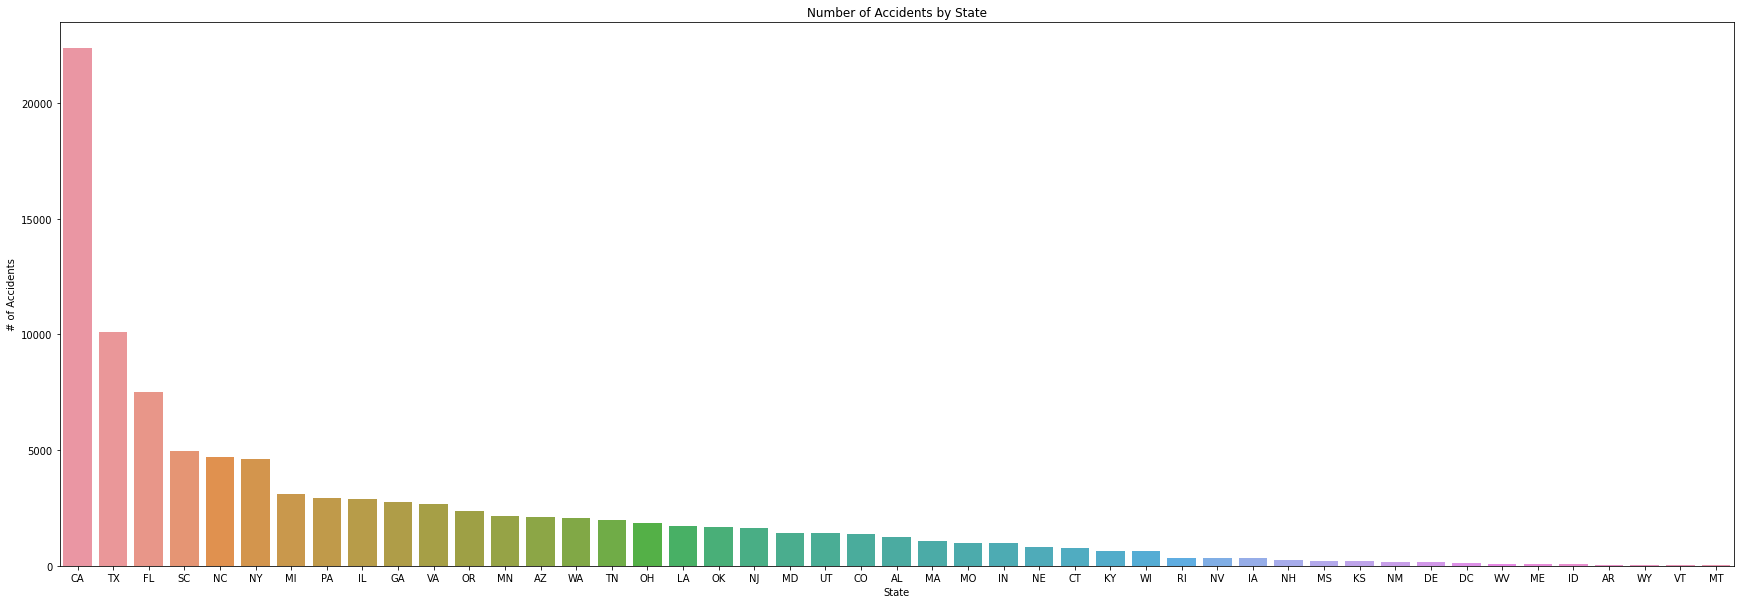

In [33]:
plt.figure(figsize=(30,10))
ax = sb.barplot(x=df.State.value_counts().index, y=df.State.value_counts())
ax.set(xlabel='State', ylabel='# of Accidents')
title  = ax.set_title("Number of Accidents by State")

Graph of the number of accidents in school zones and not in school zones

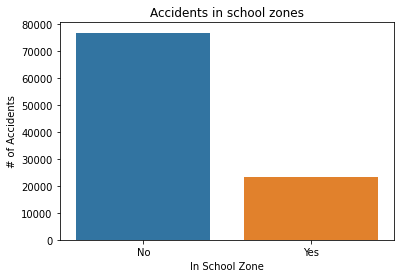

In [34]:
ax = sb.barplot(x=df.School_Zone.value_counts().index, y=df.School_Zone.value_counts())
ax.set(xlabel='In School Zone', ylabel='# of Accidents')
title = ax.set_title('Accidents in school zones')

accidents per state that occured in school zones

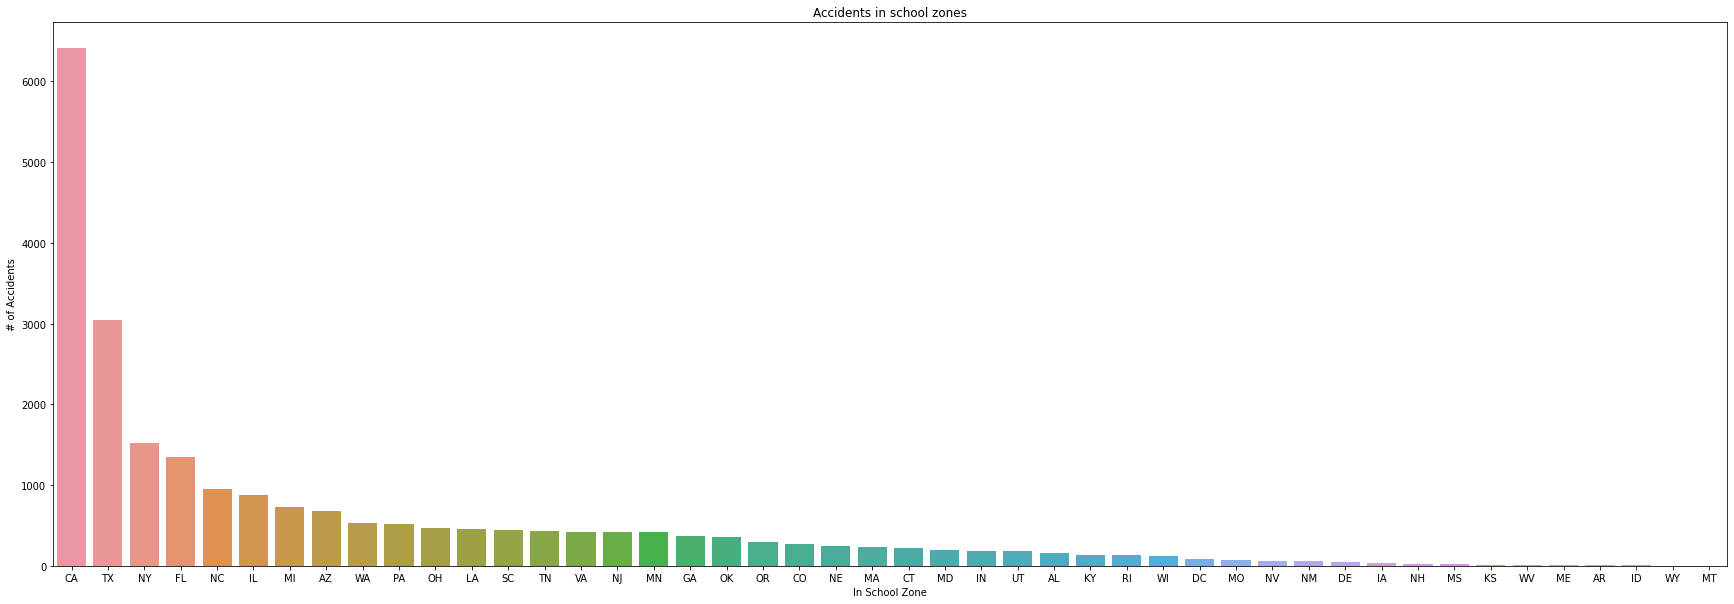

In [35]:
plt.figure(figsize=(30,10))
states = df[df['School_Zone'] == 'Yes']
ax = sb.barplot(x=states.State.value_counts().index, y=states.State.value_counts())
ax.set(xlabel='In School Zone', ylabel='# of Accidents')
title = ax.set_title('Accidents in school zones')

Geo-plot of locations of bombings based on longitude and latitude

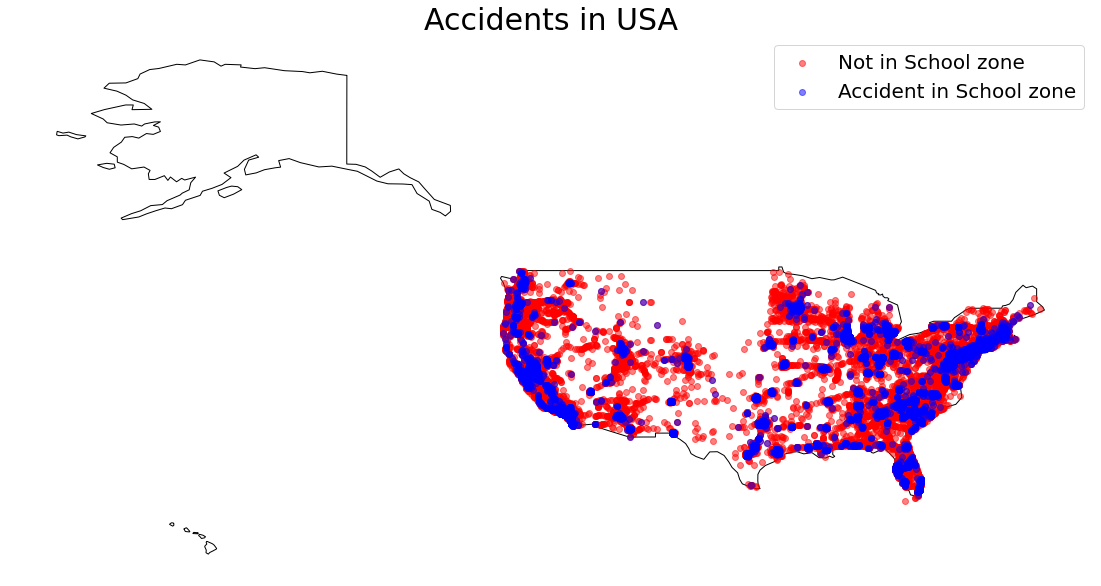

In [36]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Start_Lng, df.Start_Lat))
gdf2 = geopandas.GeoDataFrame(states, geometry=geopandas.points_from_xy(states.Start_Lng, states.Start_Lat))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world['name']=='United States of America'].plot(
    color='white', edgecolor='black', figsize=(25,10))
ax.axis('off')
gdf.plot(ax=ax, color='red', alpha=.5)
gdf2.plot(ax=ax, color='blue', alpha=0.5)
t = ax.set_title("Accidents in USA", fontsize=30)
l = ax.legend(['Not in School zone','Accident in School zone'], fontsize=20)


Top cities with most accidents


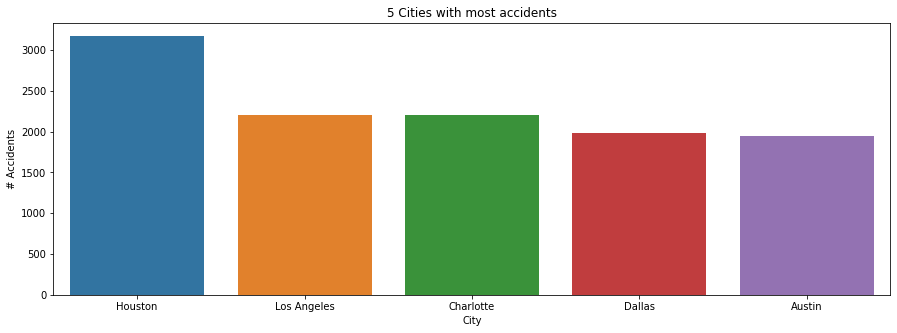

In [37]:
cities = df.groupby('City').count()
sorted = cities['Country'].sort_values(ascending=False).head(5)
plt.figure(figsize=(15,5))
ax = sb.barplot(x=sorted.index, y=sorted.values)
ax.set(xlabel='City', ylabel='# Accidents')
title = plt.title("5 Cities with most accidents")

#Try an easy solution and statistical test

Remember our questions:

1. How many accidents occur in School zones? More or less likely to occur in a School Zone?
2. How do accidents in school zones differ in severity?
3. Do other contributing factors affect the accidents in school zones (Crosswalks, roundabouts, Lights, etc.)?
4. Does weather affect accidents in school zones?

## # Number of Accidents in School Zones


In [38]:
print("There are {0} accidents in school zones out of 100,000".format(df[df['School_Zone'] == "Yes"]['State'].count()))
print("Which is {0}%".format(df[df['School_Zone']=='Yes']['State'].count()/100000 * 100))

There are 23193 accidents in school zones out of 100,000
Which is 23.193%


## How do the accidents differ in severity in school zones

accident severity is between 1 - 4

1 being least severe and 4 being most severe

In [39]:
sev = df.groupby('Severity')['School_Zone'].count()
sev

Severity
1       30
2    66908
3    29932
4     3130
Name: School_Zone, dtype: int64

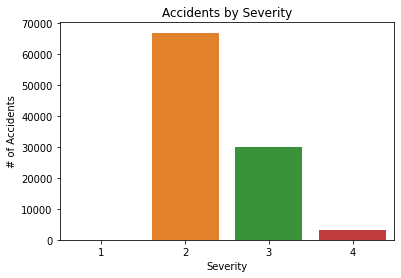

In [40]:
ax = sb.barplot(x=sev.index, y=sev.values)
ax.set(xlabel='Severity', ylabel="# of Accidents")
t=plt.title("Accidents by Severity")

Most accidents are a severity of 2 or 3


## Do other contributing factors affect the accidents in school zones (Crosswalks, roundabouts, Lights, etc.)?

To test this, we will have to perform some correlation tests with `School_Zone` and other categorical variables. We will have to do chi-squared tests to see this

### correlation between school zone and crossing (crosswalk)

for the correlation between school zone and crossing we will need a Chi squared test since they are both categorical variables

In [41]:
import scipy.stats as scs

chi_table = pd.crosstab(df['School_Zone'], df['Crossing'],margins=True)
chi_table

Crossing,False,True,All
School_Zone,,,
No,72176,4631,76807
Yes,20803,2390,23193
All,92979,7021,100000


In [42]:
chi_obs = np.array([chi_table.iloc[0][0:2].values,
                    chi_table.iloc[1][0:2].values])
chi_obs

array([[72176,  4631],
       [20803,  2390]])

In [43]:
scs.chi2_contingency(chi_obs)[0:3]

(498.1545357240956, 2.396114364458733e-110, 1)

Results of Chi-Square test:

Chi-Square value = 498.15

p-value = 2.39e-110

dof = 1

our p-value is smaller than 0.05 so we can reject the null hypothesis, concluding that there is a correlation between the Crossing and School Zone accidents

### correlation between school zone accidents and stop signs

stop signs are always in school zones, so let's test for correlation with stop signs. we will again use a chi-squared test

In [44]:
chi_table = pd.crosstab(df['School_Zone'], df['Stop'],margins=True)
chi_table

Stop,False,True,All
School_Zone,,,
No,75907,900,76807
Yes,22761,432,23193
All,98668,1332,100000


In [45]:
chi_obs = np.array([chi_table.iloc[0][0:2].values,
                    chi_table.iloc[1][0:2].values])
chi_obs

array([[75907,   900],
       [22761,   432]])

In [46]:
scs.chi2_contingency(chi_obs)[0:3]

(64.16891648421102, 1.1419627553980407e-15, 1)

Results of Chi-Square test:

Chi-Square value = 64.16

p-value = 1.14e-15

dof = 1

our p-value is smaller than 0.05 so we can reject the null hypothesis, concluding that there is a correlation between the Stop signs and School Zone accidents

## Does weather affect accidents in school zones?

to test this we will do a correlation test between the weather and the school zone. we will use a chi-square test again

In [47]:
chi_table = pd.crosstab(df['School_Zone'], df['Weather_Condition'],margins=True)
chi_table

Weather_Condition,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Clear,Cloudy,Cloudy / Windy,Drizzle,Fair,Fair / Windy,Fog,Fog / Windy,Freezing Rain,Haze,Haze / Windy,Heavy Drizzle,Heavy Rain,Heavy Rain / Windy,Heavy Snow,Heavy Snow with Thunder,Heavy T-Storm,Heavy T-Storm / Windy,Heavy Thunderstorms and Rain,Ice Pellets,Light Drizzle,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Haze,Light Ice Pellets,Light Rain,Light Rain / Windy,Light Rain Showers,Light Rain with Thunder,Light Snow,Light Snow / Windy,Light Snow Showers,Light Snow and Sleet / Windy,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Mist,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Overcast,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Rain,Rain / Windy,Rain Showers,Sand,Scattered Clouds,Shallow Fog,Showers in the Vicinity,Small Hail,Smoke,Snow,Snow / Windy,Snow Grains,Snow and Sleet,Snow and Sleet / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Unknown,Widespread Dust,Wintry Mix,Wintry Mix / Windy,All
School_Zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,2,2,11,20777,2992,55,57,8998,94,604,1,1,769,3,4,326,7,39,1,32,0,65,3,278,24,30,75,1,5,3738,21,3,48,1176,20,0,1,135,1,57,10485,49,2,9814,7484,37,65,897,4,3,3,5142,28,11,1,84,134,1,1,0,1,52,3,32,1,72,100,60,1,1756,3,24,1,76807
Yes,0,3,1,6330,806,16,10,2466,33,156,0,0,324,0,0,69,3,2,0,11,1,17,0,85,6,5,14,0,3,999,9,1,13,259,0,1,0,28,0,9,3520,21,0,2976,2584,11,10,202,2,1,0,1655,11,2,0,23,20,0,0,1,0,12,0,16,0,8,30,8,0,392,3,5,0,23193
All,2,5,12,27107,3798,71,67,11464,127,760,1,1,1093,3,4,395,10,41,1,43,1,82,3,363,30,35,89,1,8,4737,30,4,61,1435,20,1,1,163,1,66,14005,70,2,12790,10068,48,75,1099,6,4,3,6797,39,13,1,107,154,1,1,1,1,64,3,48,1,80,130,68,1,2148,6,29,1,100000


In [48]:
chi_obs = np.array([chi_table.iloc[0][0:73].values,
                    chi_table.iloc[1][0:73].values])
chi_obs

array([[    2,     2,    11, 20777,  2992,    55,    57,  8998,    94,
          604,     1,     1,   769,     3,     4,   326,     7,    39,
            1,    32,     0,    65,     3,   278,    24,    30,    75,
            1,     5,  3738,    21,     3,    48,  1176,    20,     0,
            1,   135,     1,    57, 10485,    49,     2,  9814,  7484,
           37,    65,   897,     4,     3,     3,  5142,    28,    11,
            1,    84,   134,     1,     1,     0,     1,    52,     3,
           32,     1,    72,   100,    60,     1,  1756,     3,    24,
            1],
       [    0,     3,     1,  6330,   806,    16,    10,  2466,    33,
          156,     0,     0,   324,     0,     0,    69,     3,     2,
            0,    11,     1,    17,     0,    85,     6,     5,    14,
            0,     3,   999,     9,     1,    13,   259,     0,     1,
            0,    28,     0,     9,  3520,    21,     0,  2976,  2584,
           11,    10,   202,     2,     1,     0,  1655,    1

In [49]:
scs.chi2_contingency(chi_obs)[0:3]

(300.3928754618289, 1.131024272577934e-29, 72)

Results of Chi-Square test:

Chi-Square value = 300.39

p-value = 1.13e-29

dof = 72

our p-value is smaller than 0.05 so we can reject the null hypothesis, concluding that there is a correlation between the Weather and School Zone accidents

#Conclusion and Analysis
## Are School zones effective?

Before I began the analsysis, I observed the data and perfomed many cleaning tasks on the dataset to make it more appropriate for analysis. 
 
The US Public Schools dataset was extremely clean and nearly perfect. I dropped a few columnts that were not needed but kept all the important data that I would need to determine the locations of the schools and school zones.

The US Accidents data set was fairly clean. It also had nearly 3 million records in it. When I began working with it I quickly realized that 3 million records was too much. I tried some different sample sizes and ended up doing a sample size of 100,000 random records out of the 3 million. (It still took about 1 hour to work with this dataset)

The US Accidents dataframe is the final dataframe. I first dropped some of the rows that did not have sufficient data and then dropped columns I didn't need. I imputed the zipcodes and fill Na's with consistent values in the entire dataframe. Once that was done I started calculating distances from schools to determine if the accident was in a school zone. 

In order to do this, I used Geopy Python library. Specifically, using that Lat and Long of the accident and the school location, I used the [geodesic distance](https://en.wikipedia.org/wiki/Geodesics_on_an_ellipsoid) to calculate the distance with 1/2 mile of a school. Average school zone size is between 1/2 mile and 1 mile according to NHTSA.

I added several visualizations that would be helpful to see. Most importantly, added a map of the accidents in school zones and accidents not in school zones to visualize where they occur most. Some other visualizations show accidents by states and cities with greatest number of accidents.

###Statisical analysis conclusion
recall the questions asked during analysis:

1. How many accidents occur in School zones? More or less likely to occur in a School Zone?

the analysis concluded that about 23% of accidents occur in school zones. Was about 23,000 out of 100,000 accidents in the US

2. How do accidents in school zones differ in severity?

the severity of accidents is an ordinal variable on a scale from 1 to 4. 1 being least severe and 4 being most. Most accidents were a severity level of 2.

3. Do other contributing factors affect the accidents in school zones (Crosswalks, roundabouts, Lights, etc.)?

I performed several correlations tests to determine if other contributing factors affect the accidents, and they certainly do. 

I first tested the correlation between the school zone accidents and the crosswalks or crossings. In order to do this i used a chi-squared correlation test. The results concluded that there was certainly a good correlation between crosswalks and accidents in school zones, meaning that crosswalks may cause accidents in school zones and contribute to accidents. 

I then tested the stop signs and school zone accidents. The results were very similar for the stop signs. A strong correlation exists, meaning that stop signs may also contribute to accidents in school zones.

4. Does weather affect accidents in school zones?

Lastly I performed a chi squared test on the weather and the school zones. Both are categorical variables and the test concluded that the weather has a strong impact on the accident. It certainly contributes and can cause accidents to occur.

I chose the dataset because I think that it is a question that is often overlooked. We assume that school zones are safe because of the reduced speeds, lights and crossing guards. However, There is still a great number of accidents in school zones and it can be prevented. There is also no data showing how many accidents actually occur in school zones.